In [3]:
# !pip install tsfresh

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tsfresh.utilities.dataframe_functions import roll_time_series


In [17]:
danish_df = pd.read_csv('data\danish_atm_daily.csv')
mipt_df = pd.read_csv('data\mipt_alpha.csv')
nn5_df = pd.read_csv('data/nn5.csv')

In [18]:
danish_df.head(10)

,value,value.1,value.2,value.3,value.4,value.5,value.6,value.7,value.8,value.9,...,value.103,value.104,value.105,value.106,value.107,value.108,value.109,value.110,value.111,value.112
0,68.0,126.0,73.0,62.0,85.0,45.0,102.0,26.0,4.0,4.0,...,105.0,119.0,27.0,46.0,27.0,2.0,8.0,6.0,1.0,71.0
1,130.0,0.0,102.0,50.0,75.0,35.0,96.0,40.0,0.0,0.0,...,72.0,79.0,41.0,17.0,8.0,2.0,9.0,6.0,0.0,61.0
2,142.0,0.0,100.0,51.0,72.0,41.0,107.0,44.0,0.0,0.0,...,18.0,41.0,35.0,24.0,7.0,4.0,6.0,8.0,0.0,74.0
3,101.0,144.0,95.0,37.0,71.0,0.0,0.0,0.0,0.0,0.0,...,27.0,47.0,36.0,31.0,7.0,6.0,7.0,19.0,0.0,0.0
4,120.0,112.0,83.0,34.0,33.0,0.0,0.0,0.0,0.0,0.0,...,40.0,53.0,19.0,32.0,8.0,4.0,5.0,24.0,11.0,0.0
5,124.0,119.0,107.0,32.0,65.0,41.0,73.0,28.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0
6,100.0,93.0,86.0,22.0,59.0,37.0,50.0,11.0,11.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,43.0
7,94.0,79.0,62.0,30.0,38.0,20.0,42.0,13.0,6.0,14.0,...,25.0,38.0,28.0,38.0,3.0,2.0,8.0,2.0,17.0,44.0
8,88.0,94.0,102.0,36.0,82.0,45.0,69.0,24.0,0.0,16.0,...,16.0,33.0,23.0,18.0,7.0,8.0,3.0,4.0,7.0,48.0
9,98.0,108.0,83.0,42.0,76.0,49.0,88.0,42.0,0.0,6.0,...,17.0,25.0,14.0,17.0,1.0,5.0,5.0,5.0,8.0,66.0


In [72]:
danish_df.shape

(365, 113)

In [85]:
danish_combined = pd.DataFrame({'value': danish_df.stack().reset_index(drop=True).astype('float')})

In [86]:
danish_combined.dtypes

value    float64
dtype: object

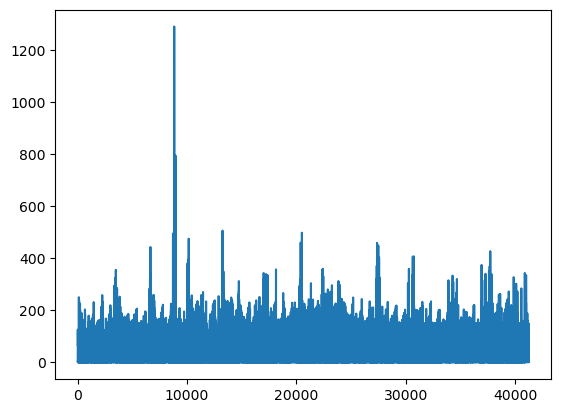

In [87]:
plt.plot(danish_combined)

In [88]:
danish_combined = danish_combined[danish_combined.value<500]

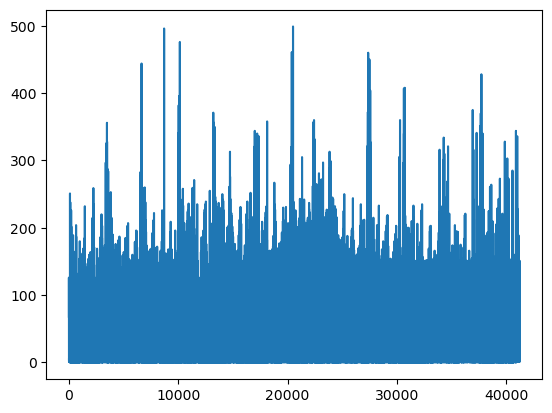

In [89]:
plt.plot(danish_combined)

In [97]:
type(danish_combined)

pandas.core.frame.DataFrame

In [100]:
from tsfresh import extract_features
danish_extarct = danish_combined.copy()
danish_extarct['id'] = 1
extracted_features = extract_features(danish_extarct, column_id='id' , column_sort=None)

Feature Extraction:   0%|          | 0/1 [02:17<?, ?it/s]


MemoryError: Unable to allocate 25.3 GiB for an array with shape (41241, 41241, 2) and data type float64